# Setup

In [1]:
import os.path
from vai_.io import pickle_load
from vai_.torch.stats import ModelStats
from vai.plot import smooth_plot
from time import sleep
from torch import load as torch_load

import torch.nn as nn

In [2]:
def smoothen(lines):
    line = lines[0]
    
    line.set_alpha(0.3)
    smooth_line = smooth_plot(line.get_ydata())[0]
    smooth_line.set_color(line.get_color())
    smooth_line.set_marker(line.get_marker())

In [3]:
def flagit(flags, keys):
    passed_flags = flags.split(',')
    keys = keys.split(',')
    flag_dict = {k: False for k in keys}
    for k in keys:
        if k in passed_flags: flag_dict[k] = True
    return flag_dict

In [4]:
def plot_progress(flags=''):
    flags = flagit(flags, 'all,log,val,pre,stop,running,curr')
    
    global history
    history = pickle_load(os.path.join(DIR_CHECKPOINTS, 'history.p'))
    
    pth = '.curriculum' if flags['curr'] else 'Checkpoints'
    his = pickle_load(os.path.join(DIR_MAIN, pth, 'history.p'))
    if not flags['all']:
        obs_per_epoch = 70
        for k in ['pre_loss', 'post_loss', 'stop_loss']:
            his[k] = his[k][-obs_per_epoch:]
            his['val_' + k] = his['val_' + k][-obs_per_epoch:]
        his['val_attn_loss'] = his['val_attn_loss'][-obs_per_epoch:]
    
    if not flags['val']:
        if flags['pre']: smoothen(plot(his['pre_loss'], 'g', label='pre'))
        smoothen(plot(his['post_loss'], 'b', label='post'))
    else:
        if flags['pre']: smoothen(plot(his['val_pre_loss'], '--g', label='pre_val'))
        smoothen(plot(his['val_post_loss'], '--b', label='post_val'))
    if flags['log']: plt.yscale('log')
    plt.legend()
    plt.title('{:.4f}'.format(his['post_loss'][-1]))
    plt.show()
    if 'similarity_loss' in his.keys():
        smoothen(plot(his['similarity_loss'], label='similarity'))
        plt.legend()
        plt.title('{:.4f}'.format(his['similarity_loss'][-1]))
        plt.show()
    if flags['running']:
        if flags['pre']: smoothen(plot(his['running_loss']['pre'], 'g', label='pre'))
        smoothen(plot(his['running_loss']['post'], 'b', label='post'))
        if flags['log']: plt.yscale('log')
        plt.legend()
        plt.title('max {:.4f} min {:.4f}'.format(max(his['running_loss']['post']), min(his['running_loss']['post'])))
        plt.show()
        if 'similarity_loss' in his.keys(): smoothen(plot(his['running_loss']['similarity'], 'b', label='similarity'))
        
    #print(torch_load(os.path.join(DIR_CHECKPOINTS, 'model.pt'))['decoder.teacher_prob'].cpu().numpy()[0])
    if flags['stop']:
        if not flags['val']:
            smoothen(plot(his['stop_loss'], label='stop'))
        else:
            smoothen(plot(his['val_stop_loss'], label='stop_val'))
        if flags['log']: plt.yscale('log')
        plt.legend()
        plt.show()
    if flags['running']:
        smoothen(plot(his['running_loss']['stop'], label='stop'))
        if flags['log']: plt.yscale('log')
        plt.legend()
        plt.show()
        
    if flags['val']:
        smoothen(plot(his['val_attn_loss'], label='attn'))
        if flags['log']: plt.yscale('log')
        plt.legend()
        plt.show()
        if 'similarity_loss' in his.keys():
            smoothen(plot(his['val_similarity_loss'], label='similarity'))
            if flags['log']: plt.yscale('log')
            plt.legend()
            plt.show()

# Progress

In [ ]:
np.random.randn

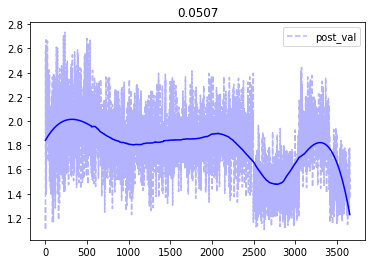

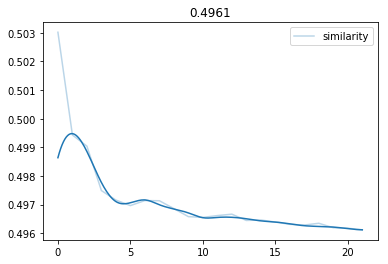

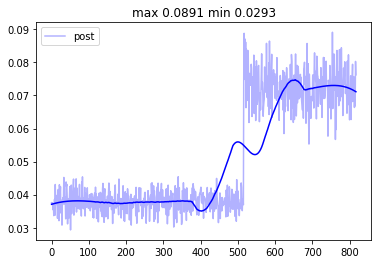

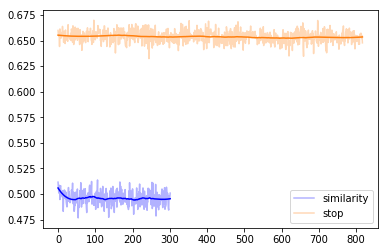

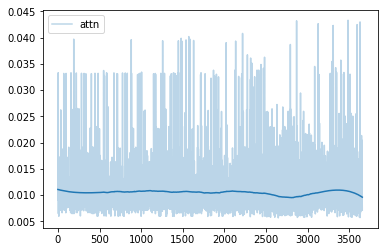

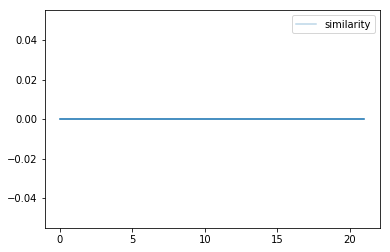

54.386308068459655


In [5]:
plot_progress('all,lg,sop,pe,val,running,cur')
print(history['iterations']/818)

# New heading

# Stats

In [47]:
stats = ModelStats(nn.Linear(1,1), store_history=True)

/home/vaisakh/AI/.pyscripts/vai_/torch/stats.py:38: UserWarning: Storing unbounded history takes a lot of space.
Continue only if you are certain you have enough space.
  warnings.warn('Storing unbounded history takes a lot of space.\n'


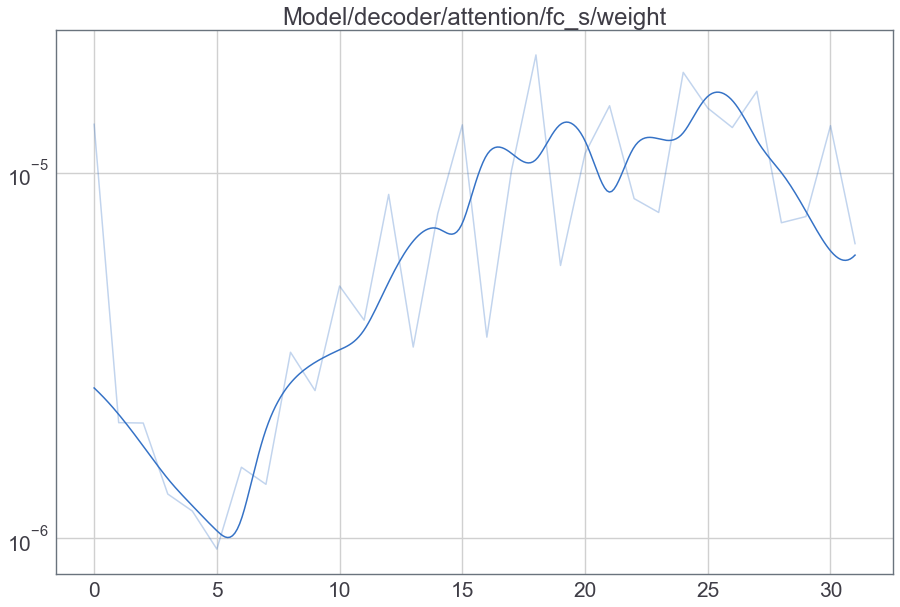

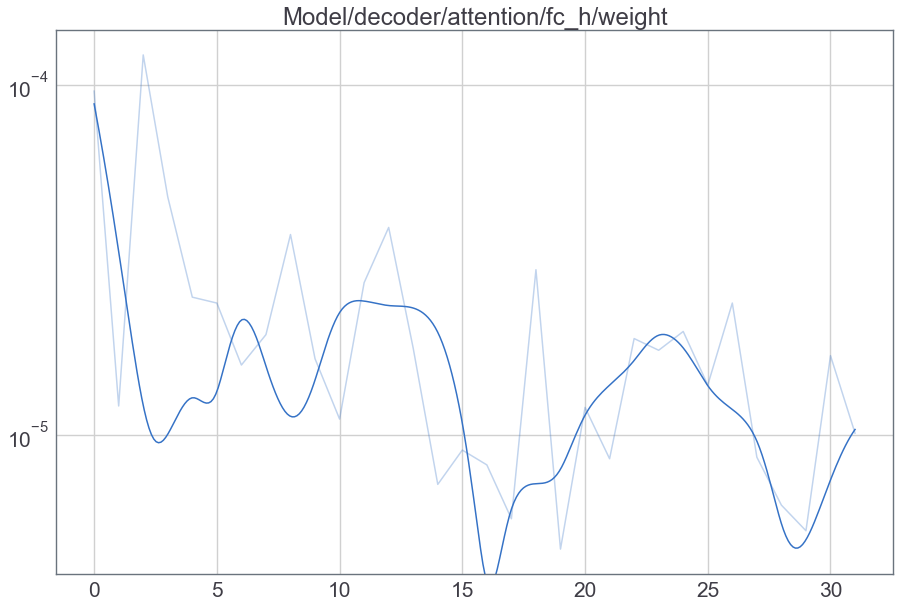

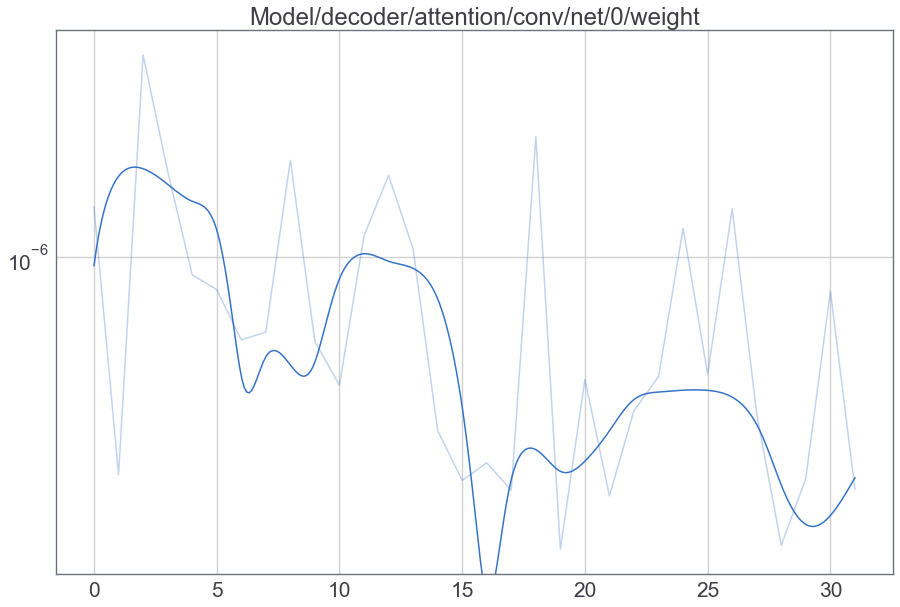

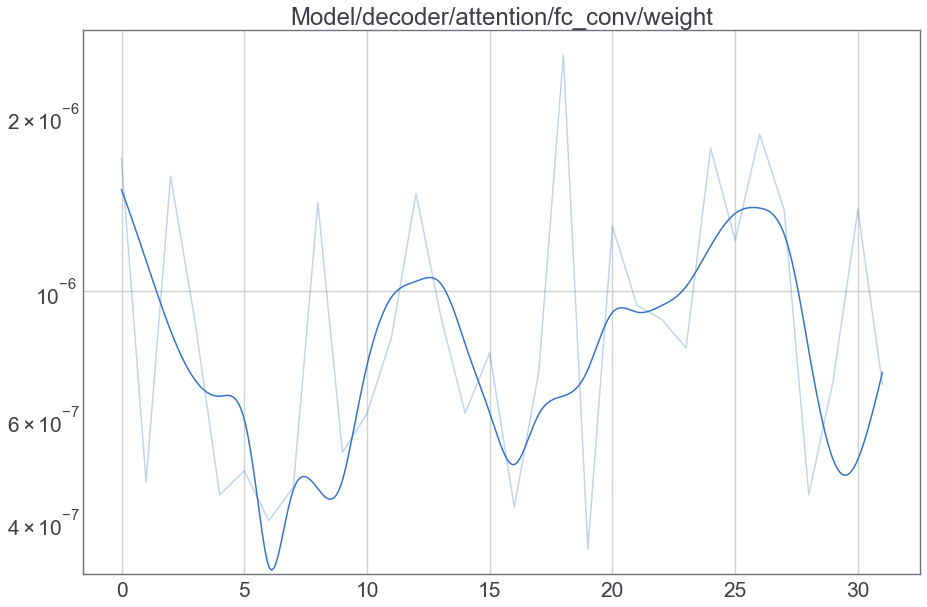

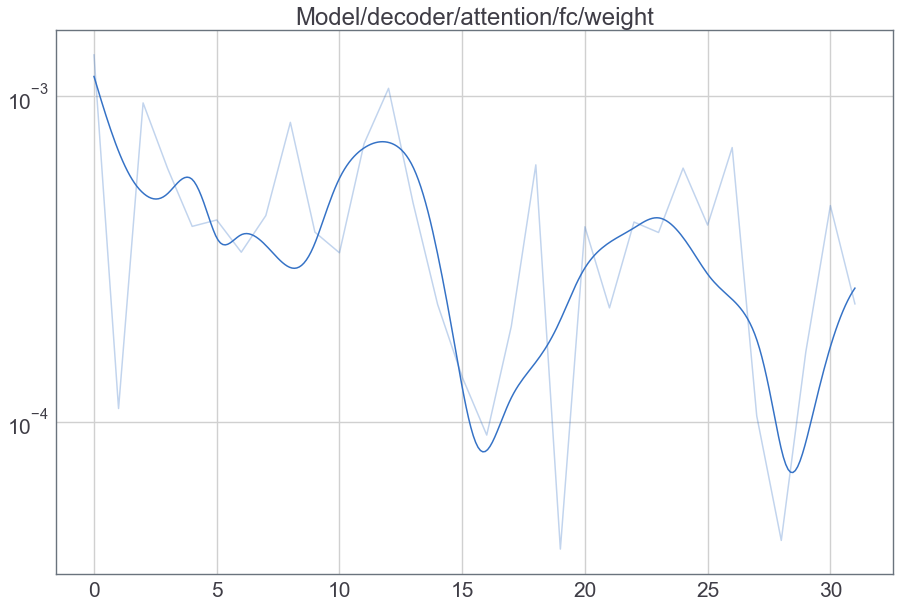

In [48]:
stats.load(os.path.join(DIR_MAIN, 'Checkpoints', 'stats.p'))
stats.plot_history(key='attention', last=-1, together=False)

In [8]:
for k, v in stats._history.items():
    if np.any(np.isnan(v)) or np.any(np.isinf(np.abs(v))): print(k)

Model/encoder/embedding/weight
Model/encoder/conv/1/net/0/weight
Model/encoder/conv/1/net/0/bias
Model/encoder/conv/2/net/0/weight
Model/encoder/conv/2/net/0/bias
Model/encoder/bn/1/weight
Model/encoder/bn/1/bias
Model/encoder/bn/2/weight
Model/encoder/bn/2/bias
Model/encoder/lstm/lstm/weight_ih_l0
Model/encoder/lstm/lstm/weight_ih_l0_reverse
